In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Load the dataset
data = pd.read_csv('dataset.csv')  # Replace with the correct file path

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Assuming the dataset has two columns: 'Voltage' (independent variable) and 'Current' (dependent variable)
X = data[['Current']]  # Features (independent variable)
y = data['Voltage']   # Target (dependent variable)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    Voltage   Current
0  0.000000  0.940218
1  0.102041  0.808512
2  0.204082  1.057567
3  0.306122  1.356152
4  0.408163  0.997995
Voltage    0
Current    0
dtype: int64


In [22]:
# print( f"x_train: {X_train}")
print( f"x_test: {X_test}")

x_test:       Current
13   1.978036
39   7.018375
30   4.853955
45  10.173456
17   2.174577
48  11.817596
26   3.486042
25   3.921818
32   5.383764
19   2.762983


In [9]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predict on the test data
y_pred = model.predict(X_test)

# Display the predicted vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

      Actual  Predicted
13  1.326531   1.323206
39  3.979592   3.617903
30  3.061224   2.632515
45  4.591837   5.054305
17  1.734694   1.412685


Mean Squared Error (MSE): 0.22023976284383912
R-squared (R2): 0.8308395167664563


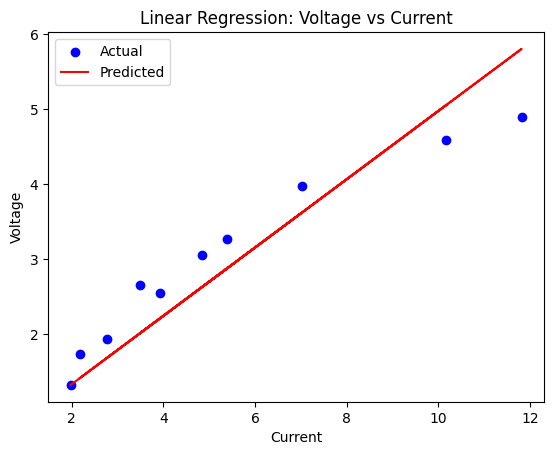

In [11]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Current')
plt.ylabel('Voltage')
plt.title('Linear Regression: Voltage vs Current')
plt.legend()
plt.show()

In [12]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.45526633]
Intercept: 0.4226728038531662


Manual Model development

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('dataset.csv')  # Replace with your file path

# Prepare the data
X = data['Voltage'].values  # Features (independent variable)
y = data['Current'].values  # Target (dependent variable)

# Normalize X (optional but recommended for faster convergence)
X = (X - np.mean(X)) / np.std(X)

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
m_train = len(X_train)  # Number of training examples
m_val = len(X_val)  # Number of validation examples
print(m_train,m_val)

40 10


In [41]:
def model(X_t):
    # Make predictions using the current slope and intercept for any input X_t
    y_pred = slope * X_t + intercept
    return y_pred
    # Initialize parameters (slope and intercept)
slope = 0
intercept = 0   

# Hyperparameters
learning_rate = 0.01  # Step size for gradient descent
iterations = 1000   # Number of iterations for gradient descent

# Lists to store the cost at each iteration
cost_history_train = []
cost_history_val = []
# y_pred_train = []



In [42]:
# Gradient Descent Algorithm
for i in range(iterations):
    # Make predictions on the training set
    y_pred_train = model(X_train)
    
    # Compute the training cost (MSE)
    cost_train = (1/n_train) * np.sum((y_pred_train - y_train) ** 2)
    cost_history_train.append(cost_train)
    
    # Compute the gradients for training set
    slope_gradient_train = -(2/n_train) * np.sum(X_train * (y_train - y_pred_train))
    intercept_gradient_train = -(2/n_train) * np.sum(y_train - y_pred_train)
    
    # Update the parameters for the training set
    slope = slope - learning_rate * slope_gradient_train
    intercept = intercept - learning_rate * intercept_gradient_train
    
    # Make predictions on the validation set
    y_pred_val = model(X_val)
    
    # Compute the validation cost (MSE)
    cost_val = (1/n_val) * np.sum((y_pred_val - y_val) ** 2)
    cost_history_val.append(cost_val)
    
    # Print progress every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Training Cost = {cost_train:.4f}, Validation Cost = {cost_val:.4f}, Slope = {slope:.4f}, Intercept = {intercept:.4f}")


Iteration 0: Training Cost = 28.4578, Validation Cost = 37.5072, Slope = 0.0550, Intercept = 0.0858
Iteration 100: Training Cost = 1.5693, Validation Cost = 2.3674, Slope = 2.4957, Intercept = 3.8763
Iteration 200: Training Cost = 0.9739, Validation Cost = 1.3938, Slope = 2.8616, Intercept = 4.4386
Iteration 300: Training Cost = 0.9607, Validation Cost = 1.3429, Slope = 2.9163, Intercept = 4.5221
Iteration 400: Training Cost = 0.9604, Validation Cost = 1.3374, Slope = 2.9245, Intercept = 4.5345
Iteration 500: Training Cost = 0.9604, Validation Cost = 1.3366, Slope = 2.9257, Intercept = 4.5364
Iteration 600: Training Cost = 0.9604, Validation Cost = 1.3365, Slope = 2.9259, Intercept = 4.5366
Iteration 700: Training Cost = 0.9604, Validation Cost = 1.3365, Slope = 2.9259, Intercept = 4.5367
Iteration 800: Training Cost = 0.9604, Validation Cost = 1.3364, Slope = 2.9259, Intercept = 4.5367
Iteration 900: Training Cost = 0.9604, Validation Cost = 1.3364, Slope = 2.9259, Intercept = 4.5367


In [17]:
# Final evaluation on training and validation sets
print(f"\nFinal Slope: {slope:.4f}, Final Intercept: {intercept:.4f}")

# Evaluate the final model on training data
y_pred_train_final = slope * X_train + intercept
mse_train_final = (1/n_train) * np.sum((y_pred_train_final - y_train) ** 2)
print(f"Final Training Mean Squared Error (MSE): {mse_train_final:.4f}")

# Evaluate the final model on validation data
y_pred_val_final = slope * X_val + intercept
mse_val_final = (1/n_val) * np.sum((y_pred_val_final - y_val) ** 2)
print(f"Final Validation Mean Squared Error (MSE): {mse_val_final:.4f}")



Final Slope: 2.9259, Final Intercept: 4.5367
Final Training Mean Squared Error (MSE): 0.9604
Final Validation Mean Squared Error (MSE): 1.3364


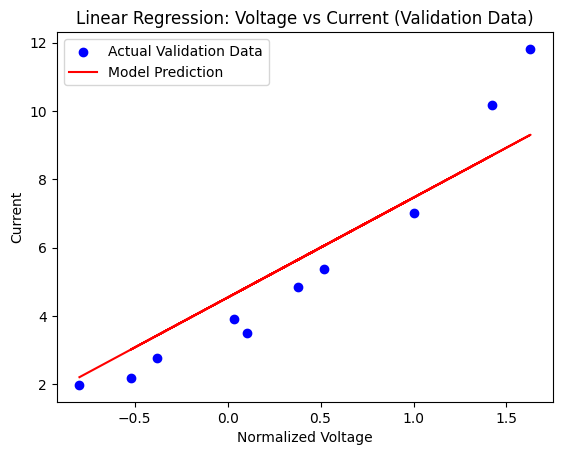

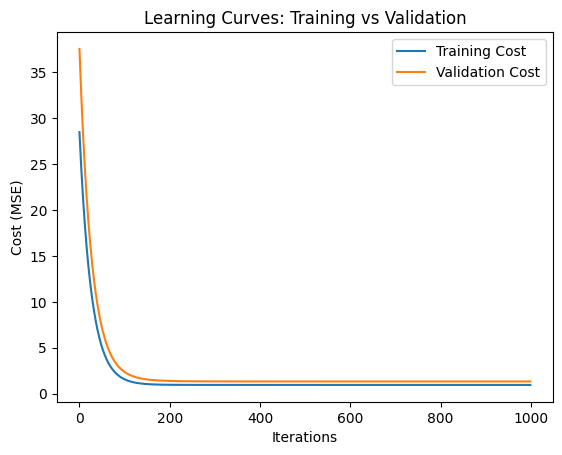

In [18]:
# Visualize the final results on validation data
plt.scatter(X_val, y_val, color='blue', label='Actual Validation Data')
plt.plot(X_val, y_pred_val_final, color='red', label='Model Prediction')
plt.xlabel('Normalized Voltage')
plt.ylabel('Current')
plt.title('Linear Regression: Voltage vs Current (Validation Data)')
plt.legend()
plt.show()

# # Plot the learning curves (Cost over iterations)
plt.plot(range(iterations), cost_history_train[:iterations], label='Training Cost')
plt.plot(range(iterations), cost_history_val[:iterations], label='Validation Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Learning Curves: Training vs Validation')
plt.legend()
plt.show()
